In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cmocean

%matplotlib inline
plt.rcParams["font.size"] = 14

In [2]:
def read_netcdf_xr(fid):
    ds = xr.open_mfdataset(fid, combine='by_coords')
    return ds

def plot_200_mask(axes, mask, bathy):
    '''function for plotting 200m isobath'''
    for ax in axes:
        mask.plot.contour(ax=ax, x='nav_lon', y='nav_lat', linewidths=0.1, colors='k')
        bathy.Bathymetry.plot.contour(ax=ax, x='nav_lon', y='nav_lat', levels=[200], linewidths=1.1, colors='k')
    return

In [3]:
root_dir = '/home/gkara/Documents/for-tide_paper/'
_f1 = ['cdfcurl_20110928_cr_ref.nc', 'cdfcurl_20120224_cr_ref.nc']
_f2 = ['cdfcurl_20110928_cr_exp1.nc', 'cdfcurl_20120224_cr_exp1.nc']

# load TON relative vorticity
curl_ref = read_netcdf_xr([root_dir + f for f in _f1])
curl_ref = curl_ref.set_coords(['nav_lon', 'nav_lat'])

# # load TOFF relative vorticity
curl_exp1 = read_netcdf_xr([root_dir + f for f in _f2])
curl_exp1 = curl_exp1.set_coords(['nav_lon', 'nav_lat'])

# load bathymetry
bathy = read_netcdf_xr(root_dir + 'bathy_meter.nc')
bathy = bathy.set_coords(['nav_lon', 'nav_lat'])

In [18]:
curl_ref

<xarray.Dataset>
Dimensions:       (depthu: 1, time_counter: 2, x: 388, y: 538)
Coordinates:
  * depthu        (depthu) float32 0.0
    nav_lon       (time_counter, y, x) float32 dask.array<chunksize=(1, 538, 388), meta=np.ndarray>
    nav_lat       (time_counter, y, x) float32 dask.array<chunksize=(1, 538, 388), meta=np.ndarray>
  * time_counter  (time_counter) datetime64[ns] 2011-09-28T12:00:00 2012-02-24T12:00:00
Dimensions without coordinates: x, y
Data variables:
    socurl        (time_counter, y, x) float32 dask.array<chunksize=(1, 538, 388), meta=np.ndarray>
Attributes:
    start_date:        -1
    output_frequency:  N/A
    CONFIG:            N/A
    CASE:              N/A

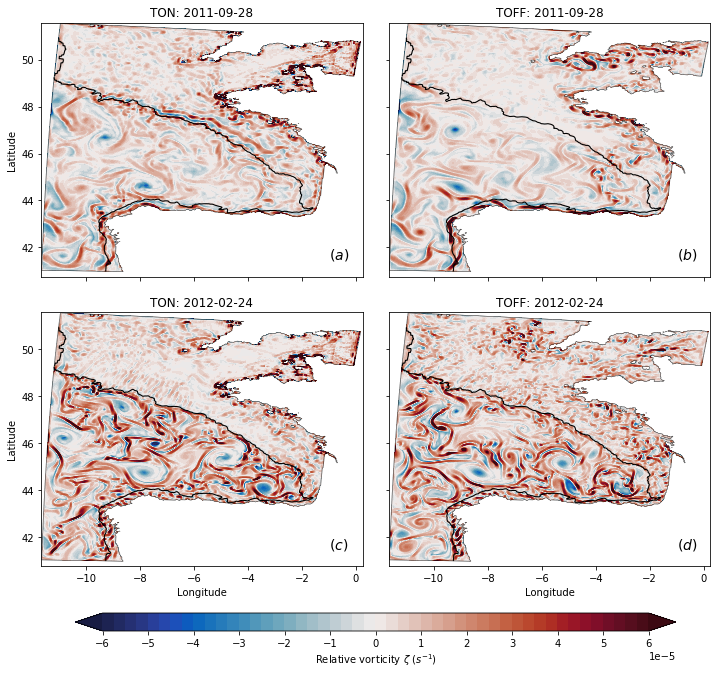

In [5]:
vmin = -.6e-04
vmax = .6e-04
levels = np.linspace(vmin,vmax,49, endpoint=True)

# make plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
fig.subplots_adjust(wspace=0.08, hspace=.14)

# plot summer
mask = np.isnan(curl_ref.socurl[0,:,:])
im0 = curl_ref.sel(time_counter='2011-09-28T12:00:00.000000000').socurl.plot.contourf(ax=axes[0,0], x='nav_lon', y='nav_lat', levels=levels, vmin=vmin, vmax=vmax, cmap=cmocean.cm.balance, add_colorbar=False)
im1 = curl_exp1.sel(time_counter='2011-09-28T12:00:00.000000000').socurl.plot.contourf(ax=axes[0,1], x='nav_lon', y='nav_lat', levels=levels, vmin=vmin, vmax=vmax, cmap=cmocean.cm.balance, add_colorbar=False)
plot_200_mask(axes=[axes[0,0], axes[0,1]], mask=mask, bathy=bathy)

# plot winter
im2 = curl_ref.sel(time_counter='2012-02-24T12:00:00.000000000').socurl.plot.contourf(ax=axes[1,0], x='nav_lon', y='nav_lat', levels=levels, vmin=vmin, vmax=vmax, cmap=cmocean.cm.balance, add_colorbar=False)
im3 = curl_exp1.sel(time_counter='2012-02-24T12:00:00.000000000').socurl.plot.contourf(ax=axes[1,1], x='nav_lon', y='nav_lat', levels=levels, vmin=vmin, vmax=vmax, cmap=cmocean.cm.balance, add_colorbar=False)
plot_200_mask(axes=[axes[1,0], axes[1,1]], mask=mask, bathy=bathy)

# plot colorbar
p0 = axes[0,0].get_position().get_points().flatten()
p1 = axes[0,1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0]+.04, 0.035, p1[2]-p0[0]-.08, 0.025])
cb = plt.colorbar(im0, cax=ax_cbar, orientation='horizontal', extend='both', label='Relative vorticity $\zeta$ ($s^{-1}$)')
cb.set_ticks(np.arange(-.6e-04,1e-03,.1e-04))
cb.formatter.set_powerlimits((0,0))
cb.update_ticks()

# adjust axes labels
axes[0,0].set_xlabel(None); axes[0,1].set_xlabel(None)
axes[0,0].set_xticklabels([]); axes[0,1].set_xticklabels([])
axes[0,1].set_ylabel(None); axes[1,1].set_ylabel(None)
axes[0,1].set_yticklabels([]); axes[1,1].set_yticklabels([])

# set titles
axes[0,0].set_title("TON: 2011-09-28"); axes[0,1].set_title("TOFF: 2011-09-28")
axes[1,0].set_title("TON: 2012-02-24"); axes[1,1].set_title("TOFF: 2012-02-24")

#annotate subplots
idx = ['$(a)$', '$(b)$', '$(c)$', '$(d)$']
for i,ax in enumerate(axes.flat):
    ax.text(-1, 41.5, idx[i], size=14, weight='bold')

#save figure
fig.savefig('../_plots/figure7.png',dpi=300,bbox_inches='tight')